# Chapter 5: Playing with Sets and Probability

## Programming Challenges

### \#5: Estimating the Area of a Circle

Area (1,000 Darts): 3.18800 (0.01477 %)
Area (10,000 Darts): 3.15640 (0.00471 %)
Area (100,000 Darts): 3.14660 (0.00159 %)
Area (1,000,000 Darts): 3.14180 (0.00006 %)


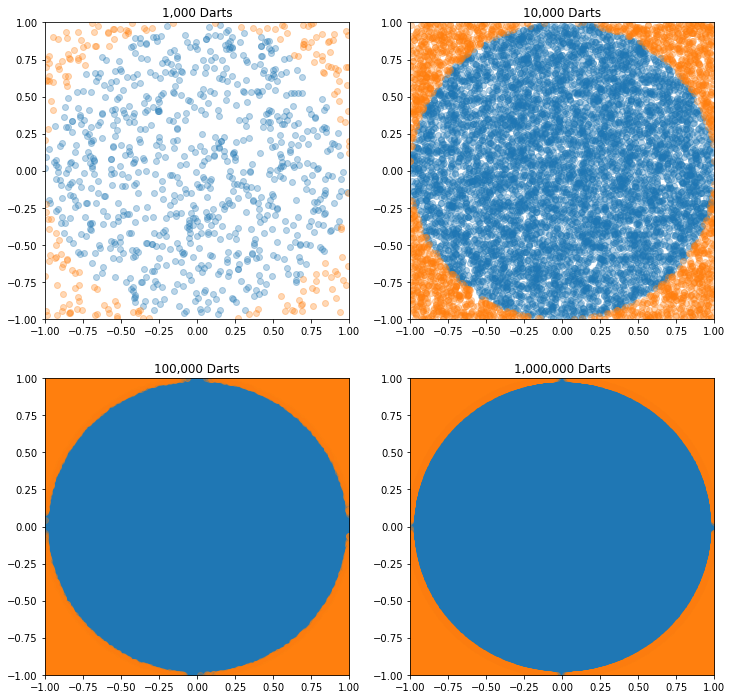

In [1]:
import math
import random

import matplotlib.pyplot as plt


def check_inside_circle(x, y):
    return (x ** 2 + y ** 2) <= 1


def generate_darts(num_of_darts):
    inside_x = []
    inside_y = []
    outside_x = []
    outside_y = []

    for _ in range(num_of_darts):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if check_inside_circle(x, y):
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    return ((inside_x, inside_y), (outside_x, outside_y))


def drew_circle(ax, num_of_darts, inside, outside):
    ax.scatter(inside[0], inside[1], alpha=0.3)
    ax.scatter(outside[0], outside[1], alpha=0.3)
    ax.set_title("{0:,} Darts".format(num_of_darts))
    ax.set_xlim(left=-1, right=1)
    ax.set_ylim(bottom=-1, top=1)


fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax = ax.flatten()


for i, num_of_darts in enumerate([1000, 10_000, 100_000, 1_000_000]):
    inside, outside = generate_darts(num_of_darts)

    estimation = len(inside[0]) / num_of_darts * 4
    print(
        "Area ({0:,} Darts): {1:.5f} ({2:.5f} %)".format(
            num_of_darts, estimation, (estimation - math.pi) / math.pi
        )
    )

    drew_circle(ax[i], num_of_darts, inside, outside)

fig.savefig("chap5_pc5_estimating-the-area-of-a-circle.png")
plt.show()